In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
if 'plots' in os.getcwd():
    print("cwd is correct")
else:
    MYDIR = ("plots")
    os.chdir("../")
    CHECK_FOLDER = os.path.isdir(MYDIR)
    ## If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

os.chdir("plots/")
print("current directroy is: ", os.getcwd())

plots folder already exists.
current directroy is:  /media/hmk/Galeri/Files/Projects/Multi_Agents_Area_Exploration/analysing_data/plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/all_data.csv")

In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
df_all.shape

(25342111, 40)

In [8]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [9]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [10]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Seed,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,25342111.0,25342111.0,25342111.0,25342111.0,2.534211e+07,25342111.0,2.534211e+07,2.534211e+07
mean,9.292248e+01,8.370077e-01,1.103849e-01,7.399697e+00,1.539867e+02,1.217252e+02,2.187371e-04,9.292248e+01,2.092519e+03,5.284630e+02,6.451129e+01,6.857582e+00,10.0,50.0,50.0,2500.0,1.070058e+01,20.0,1.778716e-01,9.479256e+04
std,8.945901e+01,2.093398e-01,1.546462e-01,6.289243e+00,1.017077e+02,1.076844e+02,1.462712e-03,8.945901e+01,5.233495e+02,4.323983e+02,8.622179e+00,3.183241e+00,0.0,0.0,0.0,0.0,6.548513e+00,0.0,7.523423e-02,5.789241e+04
min,0.000000e+00,6.440000e-02,0.000000e+00,1.000000e-02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.610000e+02,2.000000e+00,5.000000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,0.000000e+00
25%,3.200000e+01,7.568000e-01,4.000000e-02,3.040000e+00,7.900000e+01,5.500000e+01,0.000000e+00,3.200000e+01,1.892000e+03,2.172376e+02,5.700000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,4.321400e+04
50%,7.000000e+01,9.316000e-01,6.000000e-02,6.060000e+00,1.250000e+02,9.600000e+01,0.000000e+00,7.000000e+01,2.329000e+03,4.234924e+02,6.500000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,1.200000e+01,20.0,1.336000e-01,8.762500e+04
75%,1.280000e+02,9.924000e-01,1.300000e-01,1.012000e+01,2.070000e+02,1.550000e+02,0.000000e+00,1.280000e+02,2.481000e+03,7.211270e+02,7.200000e+01,8.000000e+00,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.624000e-01,1.445180e+05
max,2.499000e+03,1.000000e+00,4.960000e+00,2.631500e+02,1.282000e+03,4.838000e+03,1.000000e-02,2.499000e+03,2.500000e+03,6.943362e+03,7.900000e+01,1.200000e+01,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.772000e-01,2.024990e+05


In [11]:
# # conver columns to category that have less than 10 unique values
# for col in df_all.columns:
#     if df_all[col].nunique() < 20:
#         df_all[col] = df_all[col].astype('category')

# # print all the cols that are category
# for col in df_all.columns:
#     if df_all[col].dtype.name == 'category':
#         print(col)
        


In [12]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

In [13]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [14]:
df_agent = df_all[df_all['Loss Type'] == 'Agent']
df_agent_end = df_agent.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

----------------------------------------------------------------------------------------
# FINISHED INTROS...

In [15]:
wost_case = df_agent.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
with open(f"worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_4594/735771042.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_agent.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
/tmp/ipykernel_4594/735771042.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
DFC,256,1448,96.27,2.49
VFHC,335,906,53.67,3.75
DEGU,356,837,53.57,4.96
VFHR,378,418,39.50,3.15
UC,465,1334,68.49,4.66
G,495,1191,54.87,3.92
UR,541,471,51.06,3.31
DEGF,547,1101,58.00,4.15
FC,576,1198,60.58,4.29


In [16]:
quality_metric = df_agent_end.groupby(['M']).mean()
quality_metric['Quality'] = quality_metric['Known Area'] / quality_metric['Total Distance Travelled']
# show quality and method
quality_metric = quality_metric.reset_index()[['M','Quality','Known Area','Total Distance Travelled']]
# method_group[['M','Quality']]
quality_metric = quality_metric.sort_values(by='Quality', ascending=False)
quality_metric.reset_index()

with open(f"success_metric.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(quality_metric.to_latex())
quality_metric

/tmp/ipykernel_4594/4210531740.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(quality_metric.to_latex())


,M,Quality,Known Area,Total Distance Travelled
8,VFHC,4.350447,2500.0,574.653626
6,UC,3.932918,2500.0,635.660406
2,DFC,3.844476,2500.0,650.283750
1,DEGU,3.557354,2500.0,702.769550
9,VFHR,3.512729,2500.0,711.697324
3,FC,2.804847,2500.0,891.314293
0,DEGF,2.688594,2500.0,929.853975
5,G,2.486712,2500.0,1005.343719
7,UR,2.267811,2500.0,1102.384728
4,FR,1.661564,2500.0,1504.606439


In [17]:
# Total success count
print('Success Count: ', df_end['Success'].value_counts()[True])
# Total fail count
print('Fail Countsss: ', df_end['Success'].value_counts()[False])
# What is the overall success rate
print("Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
total_success = df_end['Success'].value_counts()[True]
total_fail = df_end['Success'].value_counts()[False]
total_experiments = total_success + total_fail
print("Total number of experiments: ", total_experiments, "\n\n")


print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())
print(df_end[df_end['Success'] == True]['Loss Type'].value_counts())
# print(df_end[df_end['Success'] == False]['Method'].value_counts())

Success Count:  173982
Fail Countsss:  28518
Success rate is:  0.8591703703703704
Total number of experiments:  202500 


Unrecoverable    28493
Disrepair           25
Name: Loss Type, dtype: int64
Agent            67500
Disrepair        67475
Unrecoverable    39007
Name: Loss Type, dtype: int64


In [18]:
df_loss_unsuccessful = df_end[df_end['Success'] == False]

# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Disrepair']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()
# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()

df_loss_unsuccessful['N Bots'].value_counts()
# sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())

4     16091
8      7667
12     4760
Name: N Bots, dtype: int64

In [19]:
loss_group = df_loss_unsuccessful.groupby(['M', 'N Bots']).count()['Experiment Id'].unstack()
loss_group

N Bots,4,8,12
M,,,
DEGF,1690,790,494
DEGU,1490,554,291
DFC,1435,448,285
FC,1408,716,522
FR,2156,1442,975
G,1863,953,566
UC,1198,469,290
UR,2007,1165,706
VFHC,1225,398,199


In [20]:
# df_end['Success Ratio'] 
loss_group2 = df_loss_unsuccessful.groupby(['Loss Type', 'N Bots']).count()['Experiment Id'].unstack()
# loss_group2['Total'] = loss_group2[4]+loss_group2[8] + loss_group2[12]

with open(f"loss_count_vs_agents_size.tex", 'w') as f:
    f.write(loss_group2.to_latex())

loss_group2

/tmp/ipykernel_4594/1641953233.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(loss_group2.to_latex())


N Bots,4,8,12
Loss Type,,,
Disrepair,25.0,NaN,NaN
Unrecoverable,16066.0,7667.0,4760.0


In [21]:
df_loss_unsuccessful.head()

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
14689614,399,0.9980,0.01,8.75,51,174,0.0,399,2495,613.215295,False,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Closest,start-Rand_Start,goal-Rand_Start,6750,Unrecoverable,UC
19543827,81,0.7720,0.00,2.91,40,92,0.0,81,1930,211.722871,False,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Closest,start-Rand_Start,goal-Rand_Start,6753,Unrecoverable,UC
20138111,58,0.6048,0.02,3.02,47,59,0.0,58,1512,117.740115,False,52,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Closest,start-Rand_Start,goal-Rand_Start,6758,Unrecoverable,UC
3047146,141,0.8604,0.01,4.05,23,105,0.0,141,2151,350.605122,False,53,False,True,False,4,10,50,50,2500,4.0,20.0,0.2676,Unknown Closest,start-Rand_Start,goal-Rand_Start,6759,Unrecoverable,UC
7637580,62,0.6736,0.01,2.94,48,64,0.0,62,1684,135.882251,False,53,False,True,False,4,10,50,50,2500,12.0,20.0,0.1296,Unknown Closest,start-Rand_Start,goal-Rand_Start,6760,Unrecoverable,UC


In [22]:
df_loss_unsuccessful_unrecoverable = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']

In [23]:
from matplotlib.scale import FuncScale

def reverse_log_scale():
    def forward(x):
        return -10**x

    def inverse(x):
        return -np.log10(-x)

    return forward, inverse

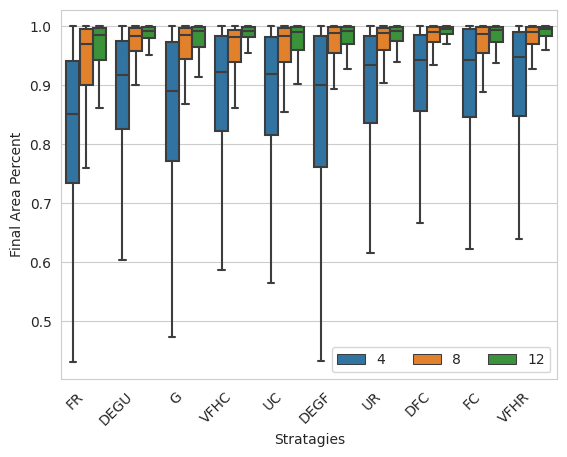

In [24]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
sorted_x_data = df_loss_unsuccessful_unrecoverable.groupby("M")["Area Percent"].median().sort_values().index
grd = sns.boxplot(
    data=df_loss_unsuccessful_unrecoverable, 
    y="Area Percent", x="M", hue="N Bots", 
    showfliers=False,
    order=sorted_x_data,
)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
grd.legend( ncol=3)

grd.set_xticklabels(grd.get_xticklabels(), rotation=45, horizontalalignment='right')
# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Final Area Percent")
grd.set_xlabel("Stratagies")
# grd.set(ylim=(0.9, 1))



plt.savefig(f"unsuccesssful_unrecoverable_analysis.png", bbox_inches='tight' ,dpi=300)

In [25]:
df_all['Area_Percentage'] = 100/df_all['Area Percent']
df_all['Area_Percentage'].describe()

count    2.534211e+07
mean     1.376251e+02
std      8.562456e+01
min      1.000000e+02
25%      1.007658e+02
50%      1.073422e+02
75%      1.321353e+02
max      1.552795e+03
Name: Area_Percentage, dtype: float64

In [26]:
# df_end['Success Ratio'] 
method_group = df_end.groupby(['M', 'Loss Type','Success',]).count()['Experiment Id'].unstack()
method_group['Success Ratio'] = method_group[True]/(method_group[True]+method_group[False])

method_group.reset_index(inplace=True)
method_group.drop(columns=[True, False], inplace=True)
# drop Success
# method_group.drop(columns=['Success'], inplace=True)
# stack up
method_group = method_group.set_index(['M',  'Loss Type']).stack().reset_index()
method_group.drop(columns=['Success'], inplace=True)
# rename the column 0 to Success Ratio
method_group.rename(columns={0:'Success Ratio'}, inplace=True)
method_group.set_index(['M',  'Loss Type'], inplace=True)

with open(f"loss_type.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(method_group.to_latex())

method_group


/tmp/ipykernel_4594/2346326559.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(method_group.to_latex())


Success Ratio
M    Loss Type                   
DEGF Agent               1.000000
     Disrepair           1.000000
     Unrecoverable       0.559407
DEGU Agent               1.000000
     Disrepair           0.999407
     Unrecoverable       0.654667
DFC  Agent               1.000000
     Disrepair           0.998963
     Unrecoverable       0.679852
FC   Agent               1.000000
     Disrepair           0.999852
     Unrecoverable       0.608148
FR   Agent               1.000000
     Disrepair           0.999556
     Unrecoverable       0.322963
G    Agent               1.000000
     Disrepair           0.999852
     Unrecoverable       0.499111
UC   Agent               1.000000
     Disrepair           0.999556
     Unrecoverable       0.710519
UR   Agent               1.000000
     Disrepair           0.999556
     Unrecoverable       0.425926
VFHC Agent               1.000000
     Disrepair           0.999556
     Unrecoverable       0.730519
VFHR Agent               1.000000
     Disrepair           1.000000
     Unrecoverable       0.587704

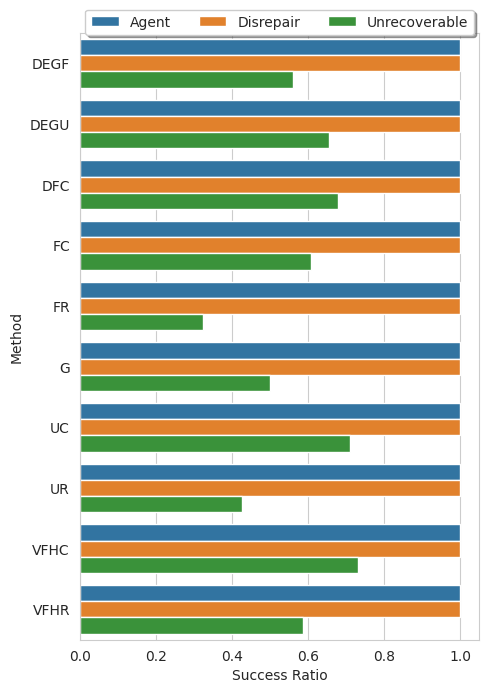

In [27]:
# method_group
sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())
# change the fig ratio
plt.gcf().set_size_inches(5, 7.)

# rename Y axis
plt.ylabel('Method')
# move the legend to the top center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
# 

# save the whole figure dont cut the legend
plt.tight_layout()


plt.savefig(f"Success_Ratio.png", dpi=300)

In [28]:
df_end_success = df_end[df_end['Success'] == True]

with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/tmp/ipykernel_4594/1376767921.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


In [29]:
df_end_success.sort_values('Frame Count')

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
16588589,4,1.0,0.40,2.62,0,74,0.00,4,2500,57.941125,True,76,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Decision Frontier Closest,start-Distributed_Start,goal-Rand_Start,167660,Agent,DFC
12954286,4,1.0,0.42,2.32,0,73,0.00,4,2500,56.526912,True,76,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Decision Frontier Closest,start-Distributed_Start,goal-Rand_Start,174410,Unrecoverable,DFC
2112884,4,1.0,0.65,3.47,10,71,0.01,4,2500,56.526912,True,76,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Decision Frontier Closest,start-Distributed_Start,goal-Rand_Start,181160,Disrepair,DFC
16324261,5,1.0,0.44,3.49,212,79,0.00,5,2500,82.769553,True,62,False,True,False,12,10,50,50,2500,12.0,20.0,0.1252,Voronoi Frontier Help Closest,start-Distributed_Start,goal-Distributed_Start,107947,Agent,VFHC
1845240,5,1.0,0.40,3.24,212,76,0.00,5,2500,75.698485,True,62,False,True,False,12,10,50,50,2500,12.0,20.0,0.1252,Voronoi Frontier Help Closest,start-Distributed_Start,goal-Distributed_Start,121447,Disrepair,VFHC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787196,840,1.0,0.52,41.73,15,191,0.00,840,2500,3217.559667,True,65,False,True,False,4,10,50,50,2500,12.0,20.0,0.1248,Frontier Random,start-Top_Left_Start,goal-Edge_Start,36766,Disrepair,FR
16605762,878,1.0,0.14,38.15,54,290,0.00,878,2500,3836.130301,True,71,False,True,False,4,10,50,50,2500,4.0,20.0,0.2640,Frontier Random,start-Top_Left_Start,goal-Top_Left_Start,37053,Disrepair,FR
2162882,932,1.0,0.47,43.61,0,395,0.00,932,2500,4162.924240,True,71,False,True,False,4,10,50,50,2500,4.0,20.0,0.2640,Frontier Random,start-Center_Start,goal-Top_Left_Start,24903,Agent,FR
2796140,980,1.0,0.09,19.53,282,183,0.00,980,2500,1970.332178,True,71,False,True,False,12,10,50,50,2500,4.0,20.0,0.2640,Unknown Random,start-Top_Left_Start,goal-Center_Start,51003,Unrecoverable,UR


In [46]:
result = df_end_success.groupby(["M"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

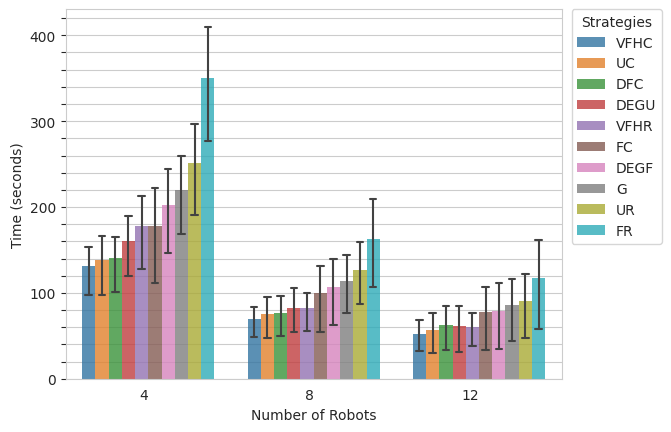

In [207]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    
    errorbar=("pi", 50),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,

    # edgecolor=".5",
    alpha=.8,
    
    hue_order=result['M']
    
    
)
# grd.legend( ncol=2,)
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

plt.yticks(range(0, 440, 20))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_barplot.png", bbox_inches='tight' ,dpi=300)

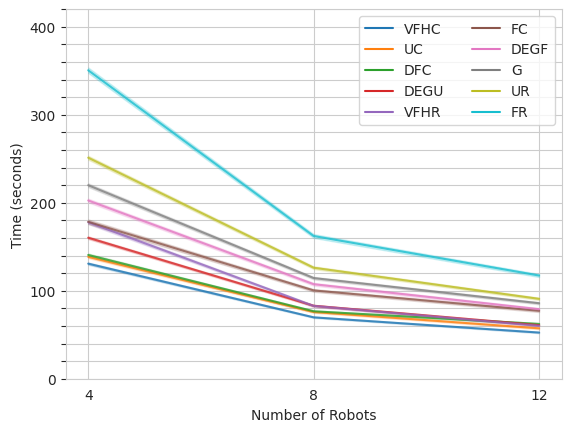

In [93]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.lineplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    
    # errorbar=("pi", 50),
    # errwidth=1.5,
    # capsize=.04,
    # errcolor=".4",
    # linewidth=0,

    # edgecolor=".5",
    alpha=.8,
    
    hue_order=result['M']
    
    
)
grd.legend( ncol=2,)

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")
# grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')
plt.xticks(range(4, 15, 4))
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

plt.yticks(range(0, 440, 20))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_lineplot.png", bbox_inches='tight' ,dpi=300)

### df_end_success

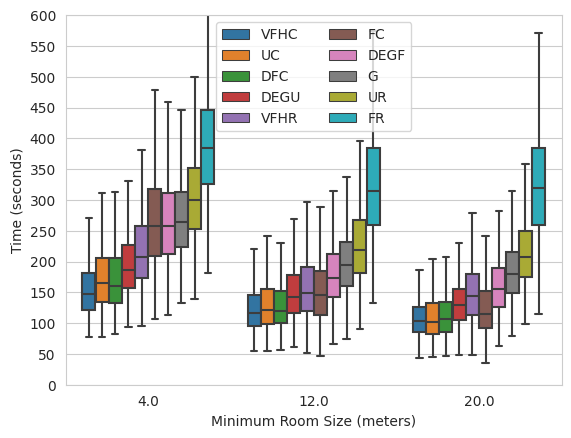

In [185]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")

grd = sns.boxplot(
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="Min Room Size", hue="M", 
    showfliers=False,
    hue_order=result['M']
)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
grd.legend( ncol=2,)


# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Minimum Room Size (meters)")
grd.set(ylim=(0, 550))
# grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 620, 50))
# for ind, label in enumerate(grd.get_yticklabels()):
#     if ind % 5 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"room_density_vs_iteration_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

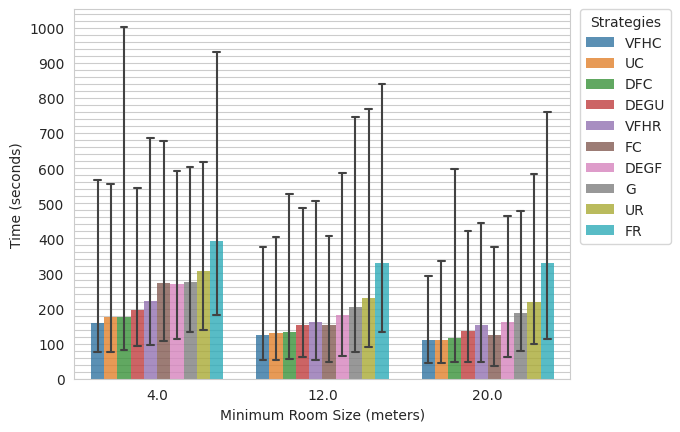

In [199]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")

grd = sns.barplot(
    # data=df_end_success, 
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="Min Room Size", hue="M", 
    # showfliers=False,
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,

    # edgecolor=".5",
    alpha=.8,
    hue_order=result['M']
)
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
# grd.legend( ncol=5,)


# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Minimum Room Size (meters)")
# grd.set(ylim=(0, 550))
# grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 1050, 20))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"room_density_vs_iteration_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

### df_agent

KeyboardInterrupt: 

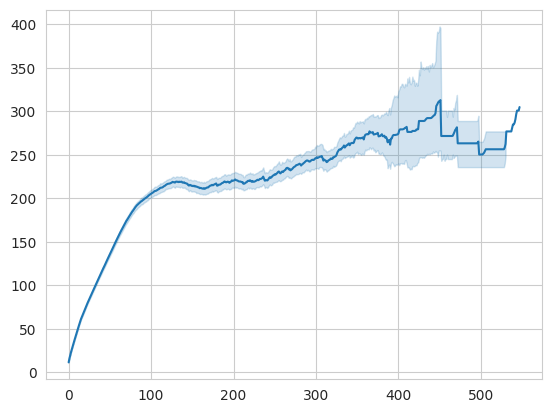

In [33]:
grd = sns.lineplot(data=df_agent, x = 'Frame Count',y = 'Replan Count', hue='M')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
plt.xticks(range(0, 1000, 100))
plt.ylim(0, 600)
plt.savefig(f"frame_count_vs_replan_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

### df_agent

In [ ]:
grd = sns.lineplot(data=df_agent, x = 'Frame Count',y = 'Replan Count', hue='Min Room Size')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Room Density')
plt.xticks(range(0, 1000, 100))
plt.ylim(0, 400)
plt.savefig(f"frame_count_vs_replan_count_hue_density.png", bbox_inches='tight' ,dpi=300)

### df_agent

KeyboardInterrupt: 

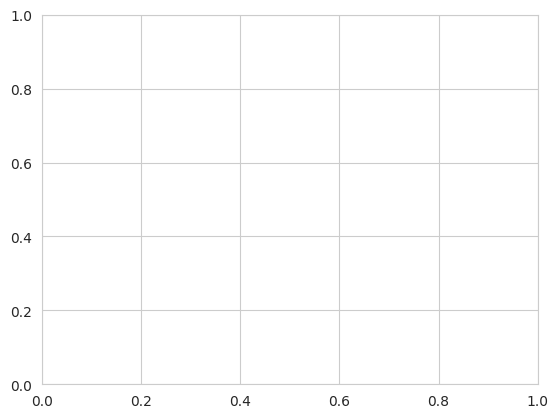

In [96]:
grd = sns.lineplot(
    # frame count less than 400
    data=df_agent, 
    x="Frame Count", y="Update Time", hue="N Bots",
    # col="Loss Type", 
)

grd.set_ylabel("System Update Time (in Sec)")
grd.set_xlabel("Iteration Count")
# set y range
plt.grid(True, which="both", ls="-", color='0.65')
# plt.yticks(np.arange(0, 1, .10))
plt.ylim(0, 0.35)
plt.xlim(0,200)
plt.legend(title='Number of Robots')

# save the figure
plt.savefig(f"update_time_vs_frame_count_n_bots.png", dpi=300)

In [ ]:
df_end_success['Goal Scenario'].unique()

In [169]:
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Edge_Start'], 'Edges of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Rand_Start'], 'Random Location')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Top_Left_Start'], 'Top Left Corner')


/tmp/ipykernel_4594/3802547872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
/tmp/ipykernel_4594/3802547872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
/tmp/ipykernel_4594/3802547872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
df_end_success['Goal Scenario'].unique()

### df_end_success

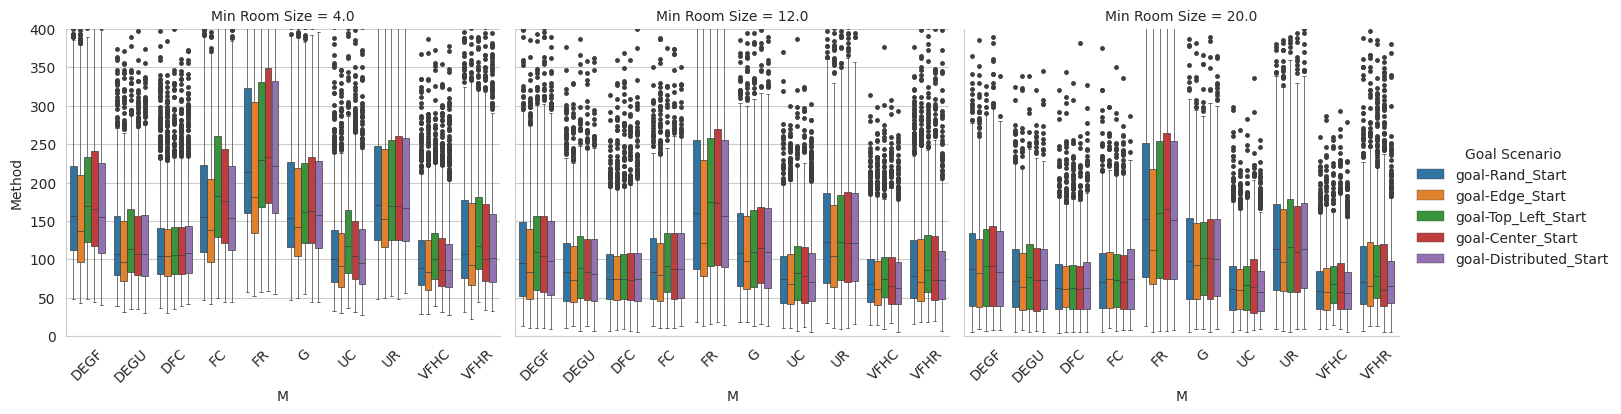

In [97]:
grd = sns.catplot(
    data=df_end_success, 
    y="Frame Count", x="M", hue="Goal Scenario", 
    # col_wrap=3,
    col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
grd.set(ylim=(0, 400))
# set Y label
grd.set_ylabels("Method")

grd.set_xticklabels(rotation=45)
# plt.yticks(range(0, 310, 20))
plt.grid(axis='y')
# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"boxplot_frame_count.png", dpi=300)

### df_end_success

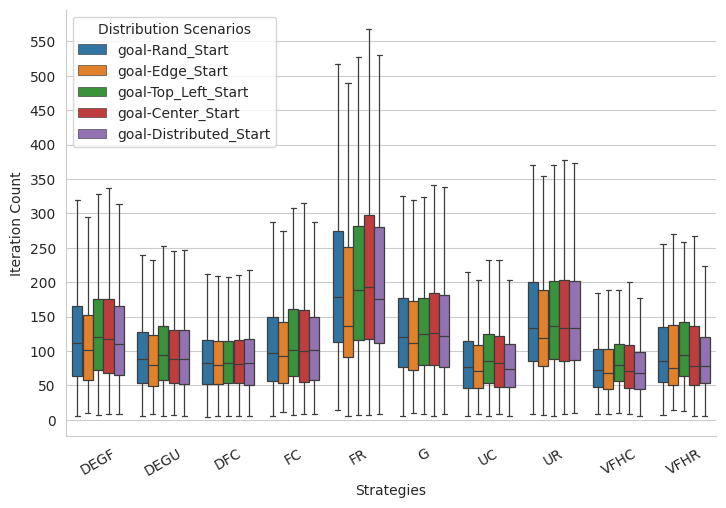

In [98]:
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
grd = sns.catplot(
    
    data=df_end_success, 
    y="Frame Count", x="M", hue="Goal Scenario", 
    # col_wrap=3,
    # col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    # flierprops={"marker": "."},
    showfliers=False,
    
    
    linewidth=0.9,
    # height=4,
    aspect=1.5,
    # palette= ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"],
)
grd._legend.remove()

# move legend top left
plt.legend( loc='upper left', title='Distribution Scenarios')
# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabels("Iteration Count")
grd.set_xlabels("Strategies")

grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 600, 50))

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"distribution_vs_segmentation.png", bbox_inches='tight' ,dpi=300)


In [167]:
palet2 = sns.color_palette("bright", 10)
paletinv = palet2.reverse()
paletinv


In [174]:
result22 = df_end_success.groupby(["Goal Scenario"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

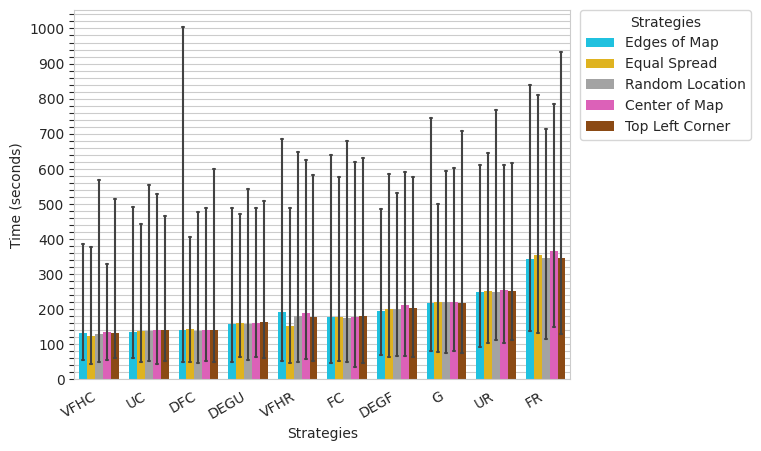

In [201]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="M", hue="Goal Scenario", 
    palette = palet2,
    
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,
    
    order=result['M'],
    hue_order = result22['Goal Scenario']
    
    
)
# grd.legend( ncol=2,)
# plt.legend(loc='upper left', title='Distribution Scenarios')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Strategies")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right', rotation=30),

# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

plt.yticks(range(0, 1050, 20))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"distribution_vs_segmentation.png", bbox_inches='tight' ,dpi=300)

# Quality ipynb file

### df_all

In [ ]:
Area_max = df_all['Rows'].iloc[0] * df_all['Cols'].iloc[0]
Area_max

### df_all

In [ ]:
# calculate Quality df_all for each all the data
# Quality = Area_max/Total Distance Traveled
df_all['Quality'] = Area_max/df_all['Total Distance Travelled']
df_all['Quality'].describe()

## *****************************************************************
### df_all

In [ ]:
df_success = df_all[df_all['Success'] == True]

In [ ]:
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
grd = sns.boxplot(
    
    data=df_all, 
    y="Quality", x="Loss Type", hue="M", 
    # col_wrap=3,
    # col="Min Room Size",
    # kind="box", 
    # bw=.25, cut=0, 
    # flierprops={"marker": "."},
    showfliers=False,

    # linewidth=0.9,
    # height=4,
    # aspect=1.5
)
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')


plt.savefig(f"distance_cost_metric_loss_type.png", dpi=300, bbox_inches='tight')

## *****************************************************************
### df_all

In [ ]:
# Sort the x-axis data based on "Quality"
sorted_x_data = df_all.groupby("M")["Quality"].median().sort_values().index

grd = sns.boxplot(
    data=df_all, 
    y="Quality", 
    hue="Loss Type", 
    x="M", 
    order=sorted_x_data,  # Specify the sorted x-axis data
    showfliers=False,
    # alpha=.8,
)

# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Loss Types')
grd.set_xticklabels(grd.get_xticklabels(), rotation=45, horizontalalignment='right')

# rename the x axis 
grd.set(xlabel='Methods')
grd.set(ylabel='Distance Based Cost Metric')

plt.savefig(f"distance_cost_metric.png", dpi=300, bbox_inches='tight')
plt.show()  # Optionally display the plot